### Name - Vyom Chauhan
### Student ID - 30830192
### Question 3

In [24]:
# load libraries:
library(reshape2)
library(ggplot2)

In [25]:
# reading test and train data into dataframes
test_df <- read.csv('Task1B_test.csv')
train_df <- read.csv('Task1B_train.csv')

In [27]:
# splitting train data into data and labels
train.data <- train_df[,-5]
train.label <- train_df[,5]
# splitting test data into data and labels
test.data <- test_df[,-5]
test.label <- test_df[,5]

In [28]:
# Question 3.1
# boot function generates a dataframe of indexes based on the sample size and number of samples
boot <- function (original.size=100, sample.size=original.size, times=100){
    # initializing the index df
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        # sampling from the available indexes
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    # returning the indx dataframe
    return(indx)
}

[1] 2694.2 2588.7 3069.3 4237.4 4693.9 3205.2 2820.1 2624.2 3062.0 3311.1
[11] 3400.4 2600.5 4307.1 3744.3 4053.1 4307.8 3058.1 4991.5 2431.9 3524.9
[21] 3109.9 4831.7 4805.7 3758.6 4087.5 3632.3 2711.9 2836.1 2830.9 3001.9
[31] 3203.9 4106.5 3380.0 2832.5 3468.9 2559.7 2513.9 2858.1 2543.4 2534.3

In [33]:
# defining knn regressor function 
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    # number of samples in train and test data
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    # distance between data points in test and train samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)] 
    # for each test sample
    for (i in 1:test.len){
        # find its k nearrest neighbours from training sample
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        # calculate predicted label based mean of the nearest k train lables
        test.label[i] = mean(train.label[nn])
        }
    # returning class labels as output
    return (test.label)
}

In [ ]:
# Question 3.2
K <- 10           # Maximum K for KNN 
L <- 50           # number of datasets
N <- 60          # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# for every k values:
for (k in 1: K){
    
    # for every dataset sizes:
    for (l in 1:L){
        
        # calculate iteration index i
        i <- (k-1)*L+l
        
        # save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        # save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        # calculate and record the test missclassification error
        miss[i,'test'] <-  sum(abs(knn(train.data[indx, ], train.label[indx], test.data, K=k)  - test.label))/nrow(test.data)
    } 
}

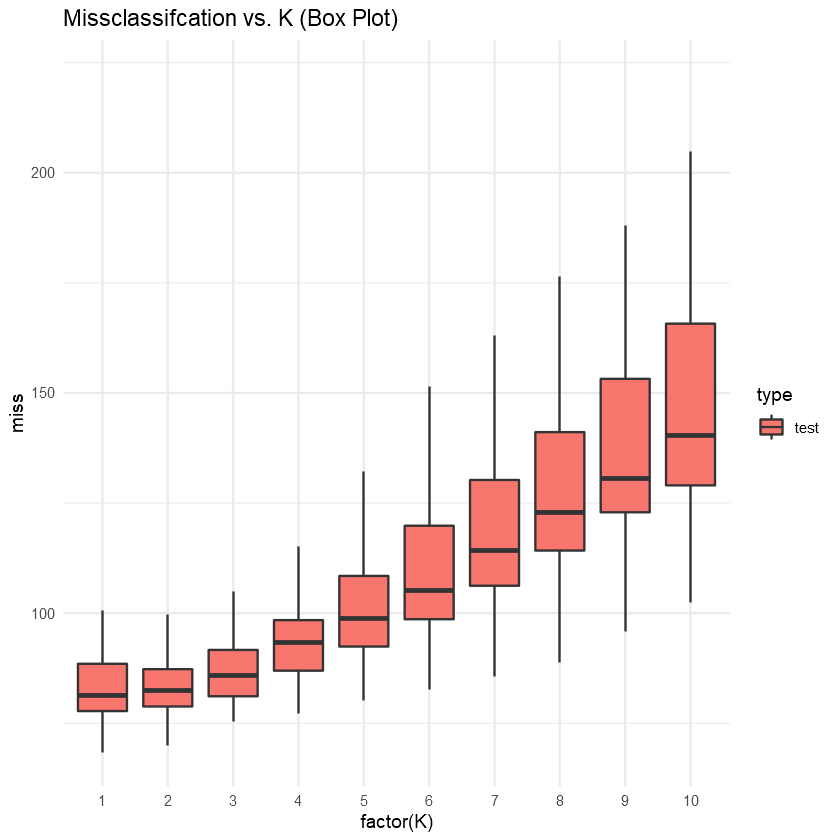

In [35]:
# Question 3.2
# reshape for visualization
miss.m <- melt(miss, id=c('K', 'L'))
names(miss.m) <- c('K', 'L', 'type', 'miss')
# plot boxplot of mean asbsolute error for test data vs K
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

### Question 3.3
#### Here, we observe that the mean absolute error increases as K increases.
#### Moreover, for large K we can see that the size of the boxplot increases as K increases. This means that the uncertainty around the error increases as K increases i.e a higher K causes an increased variation in test errors.

In [37]:
# Question 3.4
# knn for k=10 and different values of L i.e the number of datasets
K <- 10           # Maximum K for KNN 
L <- seq(10, 200, 10)          # number of datasets
N <- 40          # size of datasets

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:2100, 'L'=1:2100, 'test'=rep(0,2100))
# iteration counter
i = 1
## for every k values:
for (k in L){
    # generate bootstrap indices:
    boot.indx <- boot(nrow(train.data), N, k)
    ### for every dataset sizes:
    for (l in 1:k){
        
        # save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        # save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        # calculate and record the train and test missclassification rates
        miss[i,'test'] <-  sum(abs(knn(train.data[indx, ], train.label[indx], test.data, K=K)  - test.label))/nrow(test.data)
        i <- i + 1
    } 
}

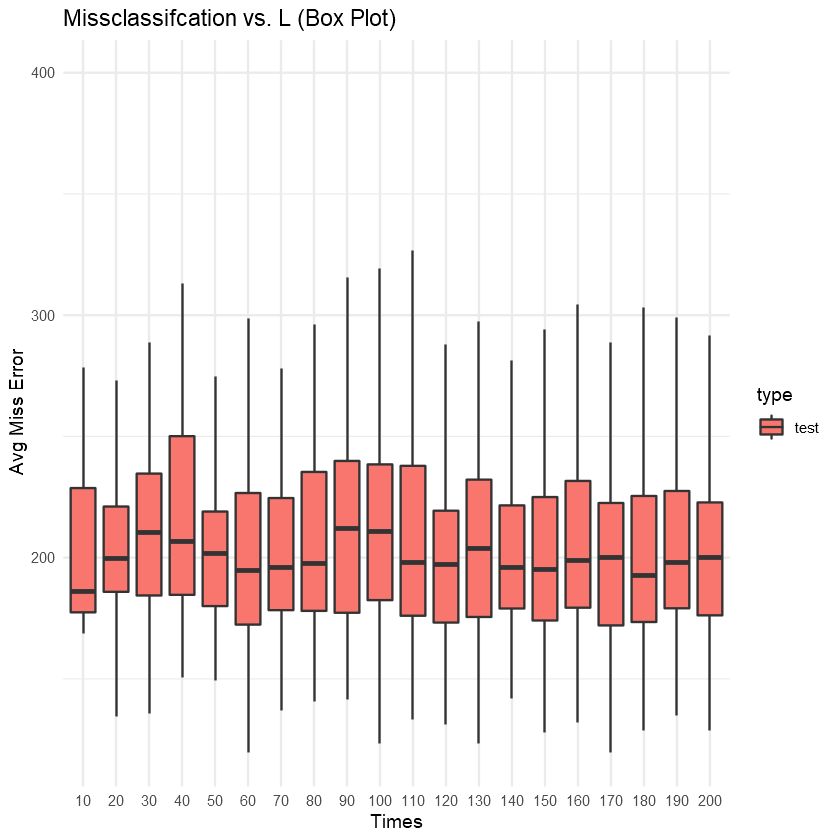

In [43]:
# Question 3.4
# reshape for visualization
miss.m <- melt(miss, id=c('K', 'L'))
names(miss.m) <- c('K', 'L', 'type', 'miss')
# plot boxplot of mean asbsolute error for test data vs L i.e number of datasets
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. L (Box Plot)') + theme_minimal() + labs(x = 'Times', y = 'Avg Miss Error' )
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

### Question 3.5
#### When plotting the average misclassification against the number of subsets in bootstrapping we observe that there isn't much variation in errors across the number of datasets drawn.
#### The range of avg. errors for the boxplots seem to be approximately equal while for L=20 and 40, the range of errors seem to be a bit low.